In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve

In [316]:
#Import Censored Data
censored_df=pd.read_csv('censored_tweets.csv')
censored_df = pd.DataFrame(censored_df)
censored_df.insert(loc=3, column='y', value=0)
censored_df = censored_df.drop(['id','lang'],axis=1)

#import regular tweets
uncensored_df=pd.read_csv('regular_tweets.csv')
uncensored_df = pd.DataFrame(uncensored_df)
uncensored_df.insert(loc=3, column='y', value=1)
uncensored_df = uncensored_df.drop(['id','lang'],axis=1)

In [317]:
#merge and shufflem
df = pd.concat([censored_df, uncensored_df], ignore_index=True, sort=False)
df = shuffle(df)

In [318]:
df_x=df["text"]
df_y=df["y"]

In [319]:
cv = CountVectorizer()

In [320]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [321]:
x_train.head()

2413    Evo 2018 May Leaderboard  #1 DBFZ (Bigger Lead...
2158          Im livin my best life .... i told yalll 🗣🎤😂
3230    [URGENT] I NEED TO REFUND THIS MAN. WHERE SHOU...
2452    Have a happy new week💞Dear Twitter friends😊💞🌿🌼...
1520    @realDonaldTrump @SecNielsen Thank you @POTUS!...
Name: text, dtype: object

In [322]:
cv = CountVectorizer()

In [323]:
x_traincv=cv.fit_transform(x_train)
x_train.iloc[0]

'Evo 2018 May Leaderboard  #1 DBFZ (Bigger Lead) #2 SFV:AE #3 TEKKEN 7  #4 Melee #5 SmashBrosWiiU  #6 BBTAG  #7 REV2  #8 Injustice 2  #Evo2018'

In [324]:
x_testcv=cv.transform(x_test)
x_testcv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [325]:
mnb = MultinomialNB()

In [326]:

y_train=y_train.astype('int')
y_train

2413    1
2158    1
3230    1
2452    1
1520    0
       ..
140     0
1381    0
2069    1
302     0
842     0
Name: y, Length: 3110, dtype: int32

In [327]:
mnb.fit(x_traincv,y_train)

MultinomialNB()

In [328]:
testmessage=x_test.iloc[0]
testmessage

'PLAY  #Casino - Get up to GBP2000 Welcome bonus  18+,Ts&amp;Cs apply  - play now with #Affpower https://t.co/n6JE8kkvuv https://t.co/HdSfwKqRX1'

In [329]:
predictions=mnb.predict(x_testcv)

In [330]:
a=np.array(y_test)

In [331]:
confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
print("Accuracy: ", mnb.score(x_testcv, y_test))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       360
           1       0.83      0.78      0.81       418

    accuracy                           0.80       778
   macro avg       0.80      0.80      0.80       778
weighted avg       0.80      0.80      0.80       778

Accuracy:  0.7982005141388174


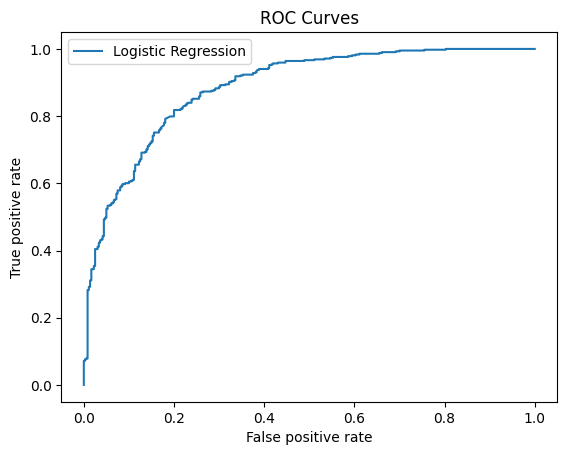

In [332]:
scores = mnb.predict_proba(x_testcv)
fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
plt.plot(fpr, tpr)

#Plot
plt.title('ROC Curves')
plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
plt.legend(['Logistic Regression'])
plt.show()

In [333]:
testSentence = ["the earth is flat"]
sentenceTransformed=cv.transform(testSentence)
result = mnb.predict_proba(sentenceTransformed)
print("This tweet has a: ", result[0,1], " chance of being censored.")
print("This tweet has a: ", result[0,0], " chance of being left uncensored.")

This tweet has a:  0.7805493077217266  chance of being censored.
This tweet has a:  0.21945069227827443  chance of being left uncensored.
